## Preparing our image data

### Note this section wont be run in the screen recording

In [13]:
import glob, os
from imagehash import phash
import pandas as pd
from PIL import Image
from location_landmark_dict import alt_names, location_landmark, location_country_dict
from get_images import landmark_shorthand

image_path = r"C:\Users\Gordon Li\Desktop\computer_vision\images"
landmark_list = list(location_landmark.keys())
shorthand_landmark_dict = {}
file_names, actual_image_paths, hash_keys = [], [], []
landmark_fulls, landmark_shorts = [], []
cities, countries = [], []
width_list, height_list = [], []
for landmark in landmark_list: 
    landmark_short = landmark_shorthand(alt_names, landmark)
    shorthand_landmark_dict[landmark_short] = landmark
    landmark_path = os.path.join(image_path, landmark_short)
    files = glob.glob(f"{landmark_path}/*.jpg")
    for file_name in files: 
        file_names.append(os.path.split(file_name)[1])
        actual_image_path = os.path.join(landmark_path, file_name)
        actual_image_paths.append(actual_image_path)
        image = Image.open(actual_image_path)
        width, height = image.size
        width_list.append(width)
        height_list.append(height)
        hash_key = phash(image)
        hash_keys.append(hash_key)
        landmark_fulls.append(landmark)
        landmark_shorts.append(landmark_short)
        city = location_landmark[landmark]
        cities.append(city)
        countries.append(location_country_dict[city])
data_dict = {}
data_dict["File Name"] = file_names
data_dict["Image Source"] = actual_image_paths
data_dict["Hash Key"] = hash_keys
data_dict["Landmark"] = landmark_fulls
data_dict["Abbreviation"] = landmark_shorts
data_dict["City"] = cities
data_dict["Country"] = countries
data_dict["Width"] = width_list
data_dict["Height"] = height_list
data_df = pd.DataFrame(data=data_dict)

In [14]:
data_df.head()

,File Name,Image Source,Hash Key,Landmark,Abbreviation,City,Country,Width,Height
0,soh_10.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,97b1202eafce643c,Sydney Opera House,soh,Sydney,Australia,612,408
1,soh_1000.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,d392cc4c72b3ab64,Sydney Opera House,soh,Sydney,Australia,612,408
2,soh_1002.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,d5a22ad5670ad9c5,Sydney Opera House,soh,Sydney,Australia,408,612
3,soh_1003.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,c6703f4ad0a56d2b,Sydney Opera House,soh,Sydney,Australia,612,408
4,soh_1004.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,bc43917f406f5893,Sydney Opera House,soh,Sydney,Australia,612,408


In [15]:
data_df.tail()

,File Name,Image Source,Hash Key,Landmark,Abbreviation,City,Country,Width,Height
6258,brooklyn_989.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,85f47484787d3a8e,Brooklyn Bridge,brooklyn,New York,United States,612,408
6259,brooklyn_99.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,84731f7c688f613c,Brooklyn Bridge,brooklyn,New York,United States,612,344
6260,brooklyn_992.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,8ec1e76934529ce9,Brooklyn Bridge,brooklyn,New York,United States,612,408
6261,brooklyn_994.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,94c3693a23d4d36e,Brooklyn Bridge,brooklyn,New York,United States,486,612
6262,brooklyn_995.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,c43ca61dccd638e6,Brooklyn Bridge,brooklyn,New York,United States,612,255


In [16]:
print("Dataset Description")
print("Our dataset have", data_df.shape[0], "photos.")
print("Our dataset have", data_df.shape[1], "columns.")
landmark_list = list(data_df["Landmark"].unique())
print(f"The number of landmarks in our dataset is {len(landmark_list)}.")

Dataset Description
Our dataset have 6263 photos.
Our dataset have 9 columns.
The number of landmarks in our dataset is 10.


## Exploratory Data Analysis

### A look at our images

In [17]:
import cv2
import matplotlib.pyplot as plt
from random import choice, seed

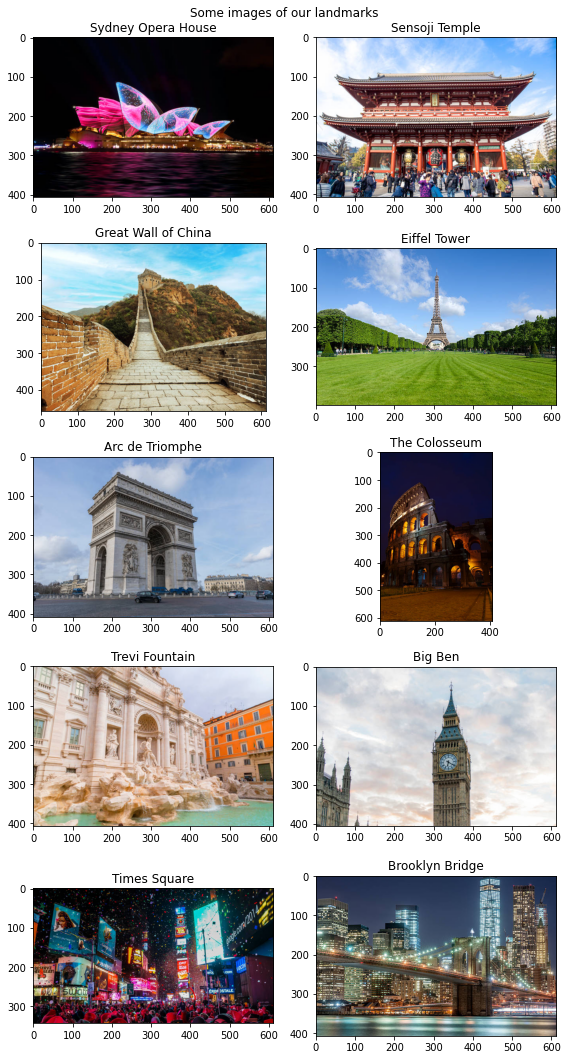

In [18]:
seed(25)
fig, axs = plt.subplots(5, 2, figsize=(8, 15))
fig.suptitle("Some images of our landmarks")
axs = axs.ravel()
i = 0
shorthand_landmark_list = list(data_df["Abbreviation"].unique())
for shorthand in shorthand_landmark_list: 
    data_reduced = data_df[data_df["Abbreviation"] == shorthand]
    num_photos = data_reduced.shape[0]
    range_list = [j for j in range(1, num_photos + 1)]
    selected_number = choice(range_list) - 1
    actual_img_path = data_reduced.iloc[selected_number, 1]
    image = cv2.imread(actual_img_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axs[i].grid(False)
    axs[i].imshow(image_rgb)
    axs[i].set_title(shorthand_landmark_dict[shorthand])
    i += 1
plt.tight_layout()
plt.show()

### Some data visualisations of images

In [19]:
import seaborn as sns
sns.set()

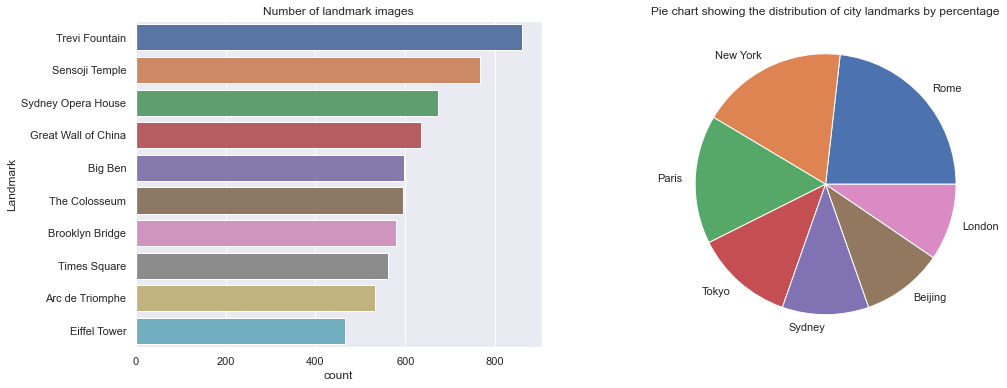

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
sns.countplot(data=data_df, 
              y="Landmark", 
              order = data_df["Landmark"].value_counts().index, ax=axs[0])
axs[0].set_title("Number of landmark images")
city_data = data_df["City"].value_counts(normalize=True).reset_index()

axs[1].pie(city_data["proportion"], labels=city_data["City"])
axs[1].set_title("Pie chart showing the distribution of city landmarks by percentage")
plt.show()

### Aspect ratio

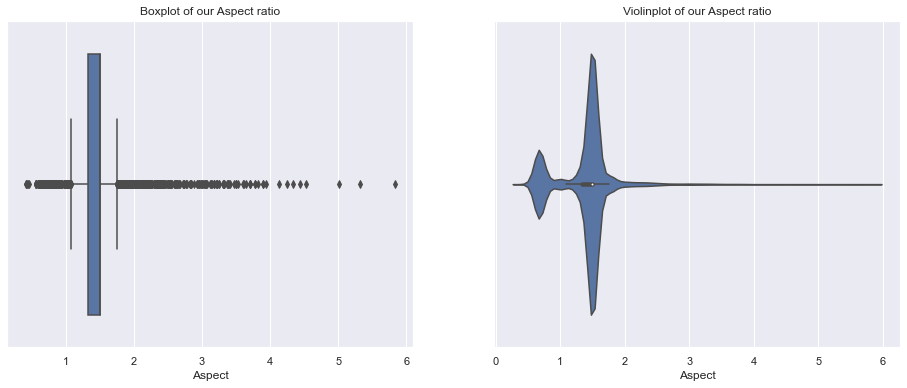

In [21]:
data_df["Aspect"] = data_df["Width"]/data_df["Height"]
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(data=data_df, x="Aspect", ax=axs[0])
axs[0].set_title("Boxplot of our Aspect ratio")
sns.violinplot(data=data_df, x="Aspect", ax=axs[1])
axs[1].set_title("Violinplot of our Aspect ratio")
plt.show()

In [22]:
percentile_25 = data_df["Aspect"].quantile(0.25)
percentile_75 = data_df["Aspect"].quantile(0.75)
iqr = percentile_75 - percentile_25
lower_limit_landscape = percentile_25 - 1.5 * iqr
upper_limit_landscape = percentile_75 + 1.5 * iqr
print("The acceptable image aspect range when the image is landscape is", end= " ")
print(f"{lower_limit_landscape} to {upper_limit_landscape}.")
lower_limit_portrait = 1 / upper_limit_landscape
upper_limit_portrait = 1 / lower_limit_landscape
print("The acceptable image aspect range when the image is portrait is", end=" ")
print(f"{lower_limit_portrait} to {upper_limit_portrait}.")

The acceptable image aspect range when the image is landscape is 1.083333333333333 to 1.75.
The acceptable image aspect range when the image is portrait is 0.5714285714285714 to 0.9230769230769234.


In [23]:
condition_1 = (data_df["Aspect"] > upper_limit_landscape)
condition_2 = (data_df["Aspect"] < lower_limit_portrait)
condition_3 = (data_df["Aspect"] > upper_limit_portrait)
condition_4 = (data_df["Aspect"] < lower_limit_landscape)
outlier_df = data_df[condition_1 | condition_2 | (condition_3 & condition_4)]

In [24]:
outlier_df.head()

,File Name,Image Source,Hash Key,Landmark,Abbreviation,City,Country,Width,Height,Aspect
23,soh_1032.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,87927aa820fdf964,Sydney Opera House,soh,Sydney,Australia,612,571,1.071804
26,soh_1037.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,ea95a96b174ab0b4,Sydney Opera House,soh,Sydney,Australia,612,344,1.779070
36,soh_1053.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,c6d72888775d4716,Sydney Opera House,soh,Sydney,Australia,612,344,1.779070
40,soh_106.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,c7b83c0751f88e36,Sydney Opera House,soh,Sydney,Australia,612,230,2.660870
48,soh_107.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,d9e74608f963865c,Sydney Opera House,soh,Sydney,Australia,612,306,2.000000


In [25]:
print(f"The number of outliers in our data is {outlier_df.shape[0]}.")

The number of outliers in our data is 633.


In [26]:
landmark_data = data_df["Landmark"].value_counts().reset_index()
landmark_outlier = outlier_df["Landmark"].value_counts().reset_index()
total_outlier_comparison = pd.merge(landmark_data, landmark_outlier
                                    , on=["Landmark", "Landmark"])
rename_dict = {"count_x": "Total Count", "count_y": "Outlier Count"}
total_outlier_comparison = total_outlier_comparison.rename(columns=rename_dict)
total_outlier_comparison["outlier_percentage"] = round(total_outlier_comparison["Outlier Count"]/total_outlier_comparison["Total Count"] * 100, 2)
total_outlier_comparison["total_reduced"] = total_outlier_comparison["Total Count"] - total_outlier_comparison["Outlier Count"]
total_outlier_comparison

,Landmark,Total Count,Outlier Count,outlier_percentage,total_reduced
0,Trevi Fountain,860,63,7.33,797
1,Sensoji Temple,767,34,4.43,733
2,Sydney Opera House,672,58,8.63,614
3,Great Wall of China,634,89,14.04,545
4,Big Ben,596,64,10.74,532
5,The Colosseum,594,94,15.82,500
6,Brooklyn Bridge,579,81,13.99,498
7,Times Square,562,44,7.83,518
8,Arc de Triomphe,533,56,10.51,477
9,Eiffel Tower,466,50,10.73,416


In [27]:
"""
Deletes outlier images
"""
file_name_list = outlier_df["File Name"].tolist()
image_source_list = outlier_df["Image Source"].tolist() 
for file_name, image_source in zip(file_name_list, image_source_list): 
    try: 
        os.remove(image_source)
        print(file_name, "has been deleted successfully")
    except Exception as e:
        print("Failed to delete", file_name, f"due to {e}.")
        

soh_1032.jpg has been deleted successfully
soh_1037.jpg has been deleted successfully
soh_1053.jpg has been deleted successfully
soh_106.jpg has been deleted successfully
soh_107.jpg has been deleted successfully
soh_1076.jpg has been deleted successfully
soh_1083.jpg has been deleted successfully
soh_114.jpg has been deleted successfully
soh_1158.jpg has been deleted successfully
soh_1181.jpg has been deleted successfully
soh_1200.jpg has been deleted successfully
soh_1216.jpg has been deleted successfully
soh_150.jpg has been deleted successfully
soh_159.jpg has been deleted successfully
soh_18.jpg has been deleted successfully
soh_186.jpg has been deleted successfully
soh_2.jpg has been deleted successfully
soh_206.jpg has been deleted successfully
soh_208.jpg has been deleted successfully
soh_209.jpg has been deleted successfully
soh_246.jpg has been deleted successfully
soh_249.jpg has been deleted successfully
soh_255.jpg has been deleted successfully
soh_270.jpg has been deleted

In [28]:
"""
Check how many files in our image data
"""
abbreviations = list(data_df["Abbreviation"].unique())
no_images = 0
for root, dirs, files in os.walk(image_path): 
    no_images += len(files)
print("The number of images remaining is", no_images)
no_deleted_images = data_df.shape[0] - no_images
print("The number of deleted images is", no_deleted_images)
print("Test if the number of images deleted is the same as the outlier images:",
      (outlier_df.shape[0] == no_deleted_images))
if (outlier_df.shape[0] == no_deleted_images): 
    print("All outlier images were deleted successfully!")


The number of images remaining is 5630
The number of deleted images is 633
Test if the number of images deleted is the same as the outlier images: True
All outlier images were deleted successfully!


In [29]:
outlier_index = list(outlier_df.index)
print(outlier_index)

[23, 26, 36, 40, 48, 50, 53, 89, 100, 117, 135, 148, 190, 197, 209, 215, 223, 229, 231, 232, 250, 253, 258, 267, 269, 282, 307, 311, 325, 330, 340, 366, 369, 376, 396, 409, 419, 425, 448, 451, 453, 464, 474, 526, 565, 570, 595, 597, 603, 608, 609, 627, 630, 632, 641, 651, 655, 666, 684, 699, 704, 754, 773, 774, 812, 855, 881, 902, 930, 949, 951, 952, 959, 960, 969, 987, 990, 992, 1010, 1114, 1150, 1189, 1201, 1202, 1292, 1294, 1298, 1334, 1367, 1433, 1434, 1438, 1440, 1443, 1447, 1477, 1486, 1502, 1507, 1509, 1525, 1540, 1545, 1555, 1573, 1598, 1600, 1604, 1609, 1610, 1611, 1617, 1621, 1624, 1632, 1633, 1645, 1660, 1671, 1672, 1674, 1677, 1681, 1694, 1695, 1702, 1706, 1709, 1711, 1712, 1713, 1715, 1727, 1732, 1733, 1736, 1738, 1739, 1742, 1745, 1760, 1768, 1771, 1775, 1777, 1784, 1791, 1810, 1813, 1842, 1847, 1856, 1863, 1874, 1880, 1887, 1890, 1893, 1905, 1909, 1912, 1914, 1920, 1927, 1932, 1942, 1951, 1956, 1974, 1976, 1978, 1984, 1996, 1999, 2007, 2009, 2010, 2027, 2036, 2052, 2064,

In [30]:
deleted_list = [0] * data_df.shape[0]
i = 0
while(i < len(deleted_list)): 
    if (i in outlier_index):
        deleted_list[i] = 1
    i += 1
data_df["deleted"] = deleted_list

In [31]:
data_post_outlier = data_df[data_df["deleted"] == 0].copy()
data_post_outlier.head()

,File Name,Image Source,Hash Key,Landmark,Abbreviation,City,Country,Width,Height,Aspect,deleted
0,soh_10.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,97b1202eafce643c,Sydney Opera House,soh,Sydney,Australia,612,408,1.500000,0
1,soh_1000.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,d392cc4c72b3ab64,Sydney Opera House,soh,Sydney,Australia,612,408,1.500000,0
2,soh_1002.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,d5a22ad5670ad9c5,Sydney Opera House,soh,Sydney,Australia,408,612,0.666667,0
3,soh_1003.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,c6703f4ad0a56d2b,Sydney Opera House,soh,Sydney,Australia,612,408,1.500000,0
4,soh_1004.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,bc43917f406f5893,Sydney Opera House,soh,Sydney,Australia,612,408,1.500000,0


In [32]:
data_post_outlier = data_df[data_df["deleted"] == 0].copy()
data_post_outlier.head()

,File Name,Image Source,Hash Key,Landmark,Abbreviation,City,Country,Width,Height,Aspect,deleted
0,soh_10.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,97b1202eafce643c,Sydney Opera House,soh,Sydney,Australia,612,408,1.500000,0
1,soh_1000.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,d392cc4c72b3ab64,Sydney Opera House,soh,Sydney,Australia,612,408,1.500000,0
2,soh_1002.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,d5a22ad5670ad9c5,Sydney Opera House,soh,Sydney,Australia,408,612,0.666667,0
3,soh_1003.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,c6703f4ad0a56d2b,Sydney Opera House,soh,Sydney,Australia,612,408,1.500000,0
4,soh_1004.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,bc43917f406f5893,Sydney Opera House,soh,Sydney,Australia,612,408,1.500000,0


### 


In [33]:
data_post_outlier

,File Name,Image Source,Hash Key,Landmark,Abbreviation,City,Country,Width,Height,Aspect,deleted
0,soh_10.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,97b1202eafce643c,Sydney Opera House,soh,Sydney,Australia,612,408,1.500000,0
1,soh_1000.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,d392cc4c72b3ab64,Sydney Opera House,soh,Sydney,Australia,612,408,1.500000,0
2,soh_1002.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,d5a22ad5670ad9c5,Sydney Opera House,soh,Sydney,Australia,408,612,0.666667,0
3,soh_1003.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,c6703f4ad0a56d2b,Sydney Opera House,soh,Sydney,Australia,612,408,1.500000,0
4,soh_1004.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,bc43917f406f5893,Sydney Opera House,soh,Sydney,Australia,612,408,1.500000,0
...,...,...,...,...,...,...,...,...,...,...,...
6255,brooklyn_978.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,bee321bdf51110b1,Brooklyn Bridge,brooklyn,New York,United States,612,403,1.518610,0
6257,brooklyn_988.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,c6b5f28a394cac8e,Brooklyn Bridge,brooklyn,New York,United States,612,408,1.500000,0
6258,brooklyn_989.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,85f47484787d3a8e,Brooklyn Bridge,brooklyn,New York,United States,612,408,1.500000,0
6260,brooklyn_992.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,8ec1e76934529ce9,Brooklyn Bridge,brooklyn,New York,United States,612,408,1.500000,0


Looking at these plot, it is possible the most common image dimension was taken when it was taken landscape at `612 x 408`. The next common is probably the portrait version which was taken at `408 x 612`.

In [36]:
data_post_outlier["Dimensions"] = data_post_outlier.apply(
    lambda x: str(x["Width"]) + "x" + str(x["Height"]), axis=1
)
data_post_outlier["Dimensions"].value_counts()[:10]


Dimensions
612x408    2848
408x612     675
612x407     226
612x459     182
612x406     107
459x612      86
612x405      85
612x409      70
612x410      53
612x402      34
Name: count, dtype: int64

We can see that our hypothesis was correct! Knowing the most common dimensions is useful for us as it allows to resize images, which we will discuss later. 

### Duplicate Images

In [37]:
print(f"The number of duplicated images is {data_post_outlier.duplicated().sum()}.")

The number of duplicated images is 0.


## Image Preprocessing

### Image Resizing

In [42]:
width_landscape = height_portrait = 612
width_portrait = height_landscape = 408
width_resize_1 = int(width_landscape * 0.9 + width_portrait * 0.1)
height_resize_1 = int(height_landscape * 0.9 + height_portrait * 0.1)
print("Our first resize is", width_resize_1, "for width and", height_resize_1)
aspect_ratio_1 = round(width_resize_1/height_resize_1, 2)
print("Our resized image has an aspect ratio of:",  aspect_ratio_1, end=".")
width_resize_2 = height_resize_2 = 64

Our first resize is 591 for width and 428
Our resized image has an aspect ratio of: 1.38.

In [43]:
seed(30)
landscape_condition_1 = (data_post_outlier["Width"] == width_landscape)
landscape_condition_2 = (data_post_outlier["Height"] == height_landscape)
portrait_condition_1 = (data_post_outlier["Width"] == width_portrait)
portrait_condition_2 = (data_post_outlier["Height"] == height_portrait)
landscape_df = data_post_outlier[landscape_condition_1 & landscape_condition_2]
portrait_df = data_post_outlier[portrait_condition_1 & portrait_condition_2]
landscape_sample_path = landscape_df.sample().iloc[0, 1]
print("The landscape sample path is:", landscape_sample_path, end=".\n")
portrait_sample_path = portrait_df.sample().iloc[0, 1]
print("The portrait sample path is:", portrait_sample_path, end=".")

The landscape sample path is: C:\Users\Gordon Li\Desktop\computer_vision\images\big\big_530.jpg.
The portrait sample path is: C:\Users\Gordon Li\Desktop\computer_vision\images\trevi\trevi_13.jpg.

In [44]:
"""
Resizes images
"""
def image_resized(image_path, type): 
    original_image = cv2.imread(image_path)
    original_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    
    if (type == "portrait"): 
        interpolation = cv2.INTER_CUBIC
    else: 
        interpolation = cv2.INTER_AREA
    
    resized_1 = cv2.resize(
        original_image, (width_resize_1, height_resize_1), interpolation=interpolation
    )
    resized_1_rgb = cv2.cvtColor(resized_1, cv2.COLOR_BGR2RGB)
    
    resized_2 = cv2.resize(
        resized_1,(width_resize_2, height_resize_2), interpolation=cv2.INTER_AREA
    )
    resized_2_rgb = cv2.cvtColor(resized_2, cv2.COLOR_BGR2RGB)
    
    original_list = [original_image, resized_1, resized_2]
    rgb_list = [original_rgb, resized_1_rgb, resized_2_rgb]
    return original_list, rgb_list

In [45]:
"""
Compare images of resized images (3 stages of resized images)
"""
def image_comparison_plots(image_resize_list, resized_list, type): 
    fig, axs = plt.subplots(1, 3, figsize=(18, 4))
    fig.suptitle(f"Image comparison of our {type} images")
    image_plot_dict = {
        0: "Original Image", 
        1: f"First {resized_list[0][0]} by {resized_list[0][1]} resize",
        2: f"Second {resized_list[1][0]} by {resized_list[1][1]} resize"
    }
    for i, image in enumerate(image_resize_list): 
        axs[i].grid(False)
        axs[i].imshow(image)
        axs[i].set_title(image_plot_dict[i])
    plt.show()

In [46]:
resized_list = [(width_resize_1, height_resize_1), (width_resize_2, height_resize_2)]
_, landscape_resize_list = image_resized(landscape_sample_path, "landscape")
_, portrait_resize_list = image_resized(portrait_sample_path, "portrait")

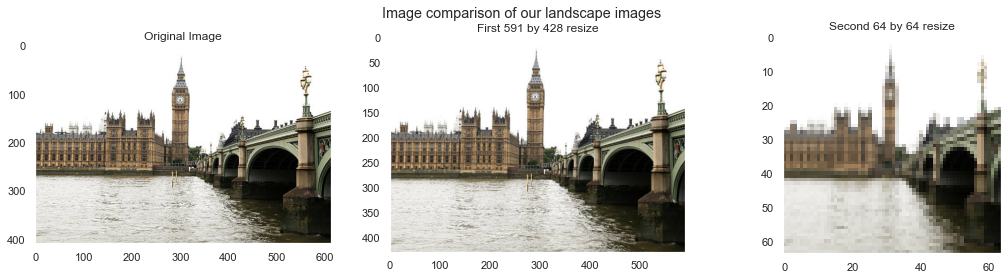

In [47]:
image_comparison_plots(landscape_resize_list, resized_list, "landscape")

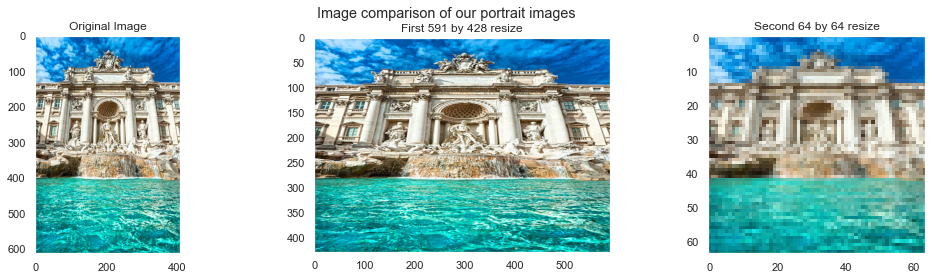

In [48]:
image_comparison_plots(portrait_resize_list, resized_list, "portrait")

#### Resizing our entire image directory

In [49]:
data_post_outlier.head()

,File Name,Image Source,Hash Key,Landmark,Abbreviation,City,Country,Width,Height,Aspect,deleted,Dimensions
0,soh_10.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,97b1202eafce643c,Sydney Opera House,soh,Sydney,Australia,612,408,1.500000,0,612x408
1,soh_1000.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,d392cc4c72b3ab64,Sydney Opera House,soh,Sydney,Australia,612,408,1.500000,0,612x408
2,soh_1002.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,d5a22ad5670ad9c5,Sydney Opera House,soh,Sydney,Australia,408,612,0.666667,0,408x612
3,soh_1003.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,c6703f4ad0a56d2b,Sydney Opera House,soh,Sydney,Australia,612,408,1.500000,0,612x408
4,soh_1004.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,bc43917f406f5893,Sydney Opera House,soh,Sydney,Australia,612,408,1.500000,0,612x408


In [50]:
data_post_outlier["type"] =  data_post_outlier.apply(
    lambda x: "Portrait" if x["Aspect"] < aspect_ratio_1 else "Landscape",
    axis=1
)
data_post_outlier = data_post_outlier.reset_index()
del data_post_outlier["index"]

In [51]:
data_post_outlier.head()

,File Name,Image Source,Hash Key,Landmark,Abbreviation,City,Country,Width,Height,Aspect,deleted,Dimensions,type
0,soh_10.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,97b1202eafce643c,Sydney Opera House,soh,Sydney,Australia,612,408,1.500000,0,612x408,Landscape
1,soh_1000.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,d392cc4c72b3ab64,Sydney Opera House,soh,Sydney,Australia,612,408,1.500000,0,612x408,Landscape
2,soh_1002.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,d5a22ad5670ad9c5,Sydney Opera House,soh,Sydney,Australia,408,612,0.666667,0,408x612,Portrait
3,soh_1003.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,c6703f4ad0a56d2b,Sydney Opera House,soh,Sydney,Australia,612,408,1.500000,0,612x408,Landscape
4,soh_1004.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,bc43917f406f5893,Sydney Opera House,soh,Sydney,Australia,612,408,1.500000,0,612x408,Landscape


In [52]:
"""
Saves each resized image
"""
no_rows = data_post_outlier.shape[0]
for i in range(no_rows): 
    image_path = data_post_outlier.loc[i, "Image Source"]
    type = data_post_outlier.loc[i, "type"]
    resized_list, _ = image_resized(image_path, type)
    cv2.imwrite(image_path, resized_list[-1])

In [54]:
"""
Tests image size
"""
image_source_resized_list = data_post_outlier["Image Source"].tolist()
image_resize_false = []
i = 1
for image_path in image_source_resized_list: 
    if (i % 500 == 0):
        print(f"Testing {i}th image size")
    image = Image.open(image_path)
    width, height = image.size
    if (width != 64 or height != 64): 
        image_resize_false.append(image_path)
    i += 1
if (len(image_resize_false) == 0):
    print(f"All images have been resized properly!!!")

Testing 500th image size
Testing 1000th image size
Testing 1500th image size
Testing 2000th image size
Testing 2500th image size
Testing 3000th image size
Testing 3500th image size
Testing 4000th image size
Testing 4500th image size
Testing 5000th image size
Testing 5500th image size
All images have been resized properly!!!


In [55]:
data_post_resize = data_post_outlier.copy() 
resize_columns = ["Width", "Height", "Aspect", "Dimensions", "type"]
for column in resize_columns: 
    del data_post_resize[column]
data_post_resize.head()

,File Name,Image Source,Hash Key,Landmark,Abbreviation,City,Country,deleted
0,soh_10.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,97b1202eafce643c,Sydney Opera House,soh,Sydney,Australia,0
1,soh_1000.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,d392cc4c72b3ab64,Sydney Opera House,soh,Sydney,Australia,0
2,soh_1002.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,d5a22ad5670ad9c5,Sydney Opera House,soh,Sydney,Australia,0
3,soh_1003.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,c6703f4ad0a56d2b,Sydney Opera House,soh,Sydney,Australia,0
4,soh_1004.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,bc43917f406f5893,Sydney Opera House,soh,Sydney,Australia,0


### Removing Noise

In [56]:
noise_sample_df = data_post_resize.sample(n=4, random_state=30)
noise_sample_df.head()

,File Name,Image Source,Hash Key,Landmark,Abbreviation,City,Country,deleted
1061,sensoji_577.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,ecc6037b33c9c03e,Sensoji Temple,sensoji,Tokyo,Japan,0
4302,big_368.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,96c915c977a85785,Big Ben,big,London,United Kingdom,0
2593,arc_51.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,c5b5f69c8a826a35,Arc de Triomphe,arc,Paris,France,0
3566,trevi_250.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,8be33c2b81156bea,Trevi Fountain,trevi,Rome,Italy,0


In [57]:
"""
Denoises images via gaussian blur
"""
def image_denoiser(image_path): 
    original_image = cv2.imread(image_path)
    original_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    kernel_size = [3, 5, 7]
    kernel_denoiser_dict = {}
    kernel_denoiser_dict["orginal"] = original_rgb
    for size in kernel_size: 
        blurred_image = cv2.GaussianBlur(original_image, (size, size), 0)
        blurred_rgb = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB)
        kernel_denoiser_dict[size] = blurred_rgb
    return kernel_denoiser_dict

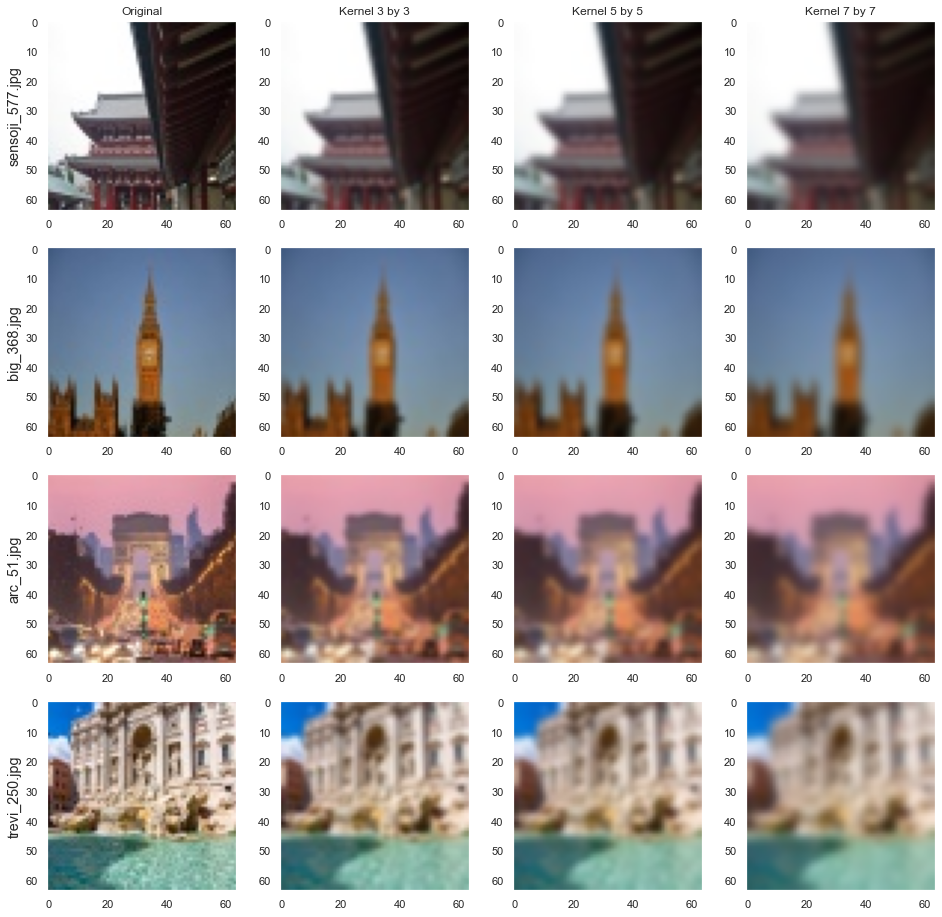

In [58]:
image_source_list = noise_sample_df["Image Source"].tolist()
fig, axs = plt.subplots(4, 4, figsize=(16, 16))
for i, image_path in enumerate(image_source_list): 
    kernel_denoiser_dict = image_denoiser(image_path)
    kernel_list = list(kernel_denoiser_dict.keys())
    for j, kernel_size in enumerate(kernel_list): 
        axs[i, j].grid(False)
        axs[i, j].imshow(kernel_denoiser_dict[kernel_size])


cols = ["Original", "Kernel 3 by 3", "Kernel 5 by 5", "Kernel 7 by 7"]
for ax, col in zip(axs[0], cols): 
    ax.set_title(col)

rows = noise_sample_df["File Name"].tolist()
for ax, row in zip(axs[:, 0], rows): 
    ax.set_ylabel(row, rotation = 90, size='large')

In [59]:
## Choose 3 by 3
image_source_list = data_post_resize["Image Source"].tolist() 
i = 0
for img_path in image_source_list: 
    original_image = cv2.imread(img_path)
    blurred_image = cv2.GaussianBlur(original_image, (3, 3), 0)
    cv2.imwrite(img_path, blurred_image)

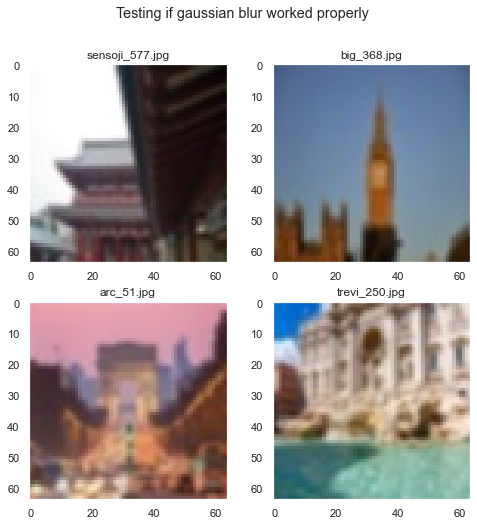

In [60]:
sampled_image_paths = noise_sample_df["Image Source"].tolist()
sampled_img_files = noise_sample_df["File Name"].tolist()
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
fig.suptitle("Testing if gaussian blur worked properly")
axs = axs.ravel()
for img_path, ax, title in zip(sampled_image_paths, axs, sampled_img_files): 
    image = cv2.imread(img_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax.imshow(image_rgb)
    ax.set_title(title)
    ax.grid(False)
plt.show()

We could see that our gaussian blur worked as expected.

### Sharpening an Image

In [61]:
import numpy as np
kernel = np.array([
    [0, -1, 0], 
    [-1, 5, -1],
    [0, -1, 0]
])
data_sharpened_sample = data_post_resize.sample(n=4, random_state=30)
data_sharpened_sample.head()

,File Name,Image Source,Hash Key,Landmark,Abbreviation,City,Country,deleted
1061,sensoji_577.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,ecc6037b33c9c03e,Sensoji Temple,sensoji,Tokyo,Japan,0
4302,big_368.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,96c915c977a85785,Big Ben,big,London,United Kingdom,0
2593,arc_51.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,c5b5f69c8a826a35,Arc de Triomphe,arc,Paris,France,0
3566,trevi_250.jpg,C:\Users\Gordon Li\Desktop\computer_vision\ima...,8be33c2b81156bea,Trevi Fountain,trevi,Rome,Italy,0


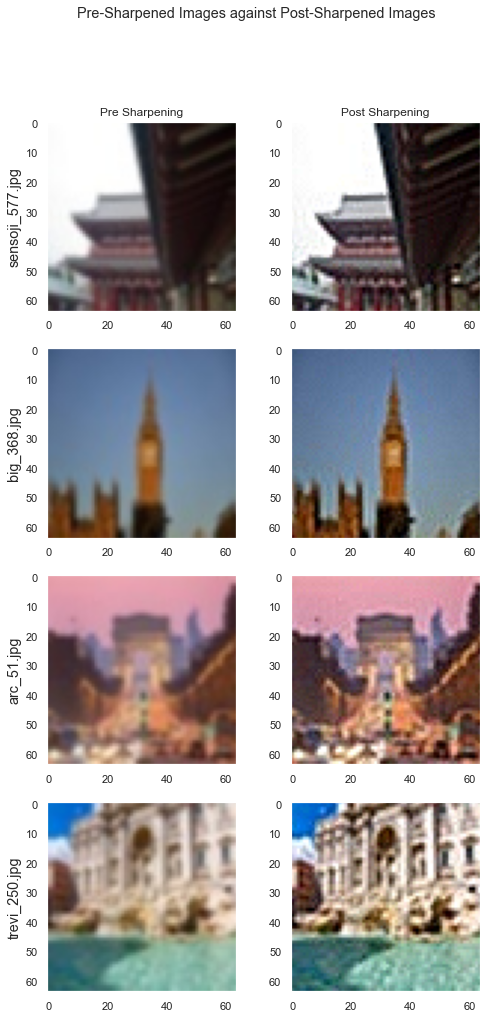

In [62]:
file_list = data_sharpened_sample["File Name"].tolist()
image_source_list = data_sharpened_sample["Image Source"].tolist()
fig, axs = plt.subplots(4, 2, figsize=(8, 16))
fig.suptitle("Pre-Sharpened Images against Post-Sharpened Images")
i = 0
for file, img_path in zip(file_list, image_source_list):
    original_image = cv2.imread(img_path)
    original_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    axs[i, 0].imshow(original_rgb)
    axs[i, 0].set_ylabel(file, rotation = 90, size='large')
    axs[i, 0].grid(False)
    sharpened_image = cv2.filter2D(original_image, -1, kernel)
    sharpened_rgb = cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB)
    axs[i, 1].imshow(sharpened_rgb)
    axs[i, 1].grid(False)
    if (i == 0): 
        axs[i, 0].set_title("Pre Sharpening")
        axs[i, 1].set_title("Post Sharpening")
    i += 1
plt.show()

In [63]:
image_source_list = data_post_outlier["Image Source"].tolist() 
for img_path in image_source_list: 
    original_image = cv2.imread(img_path)
    sharpened_image = cv2.filter2D(original_image, -1, kernel)
    cv2.imwrite(img_path, sharpened_image)

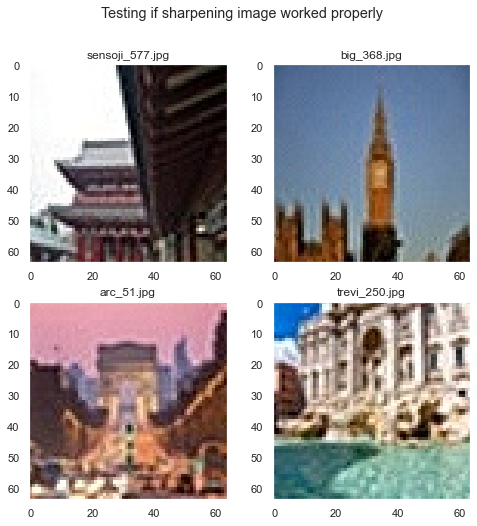

In [64]:
sampled_image_paths = data_sharpened_sample["Image Source"].tolist()
sampled_img_files = data_sharpened_sample["File Name"].tolist()
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
fig.suptitle("Testing if sharpening image worked properly")
axs = axs.ravel()
for img_path, ax, title in zip(sampled_image_paths, axs, sampled_img_files): 
    image = cv2.imread(img_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax.imshow(image_rgb)
    ax.set_title(title)
    ax.grid(False)
plt.show()